In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [3]:
data=data[data.country_region=="United States"]

In [4]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [5]:
data=data[data.date.astype(str).str.contains("2020-03")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794410,US,United States,NaN,NaN,NaN,NaN,NaN,2020-03-01,13.0,9.0,18.0,7.0,3.0,-1.0
1794411,US,United States,NaN,NaN,NaN,NaN,NaN,2020-03-02,7.0,6.0,10.0,2.0,3.0,-1.0
1794412,US,United States,NaN,NaN,NaN,NaN,NaN,2020-03-03,11.0,10.0,20.0,3.0,2.0,-1.0
1794413,US,United States,NaN,NaN,NaN,NaN,NaN,2020-03-04,8.0,6.0,17.0,2.0,3.0,-1.0
1794414,US,United States,NaN,NaN,NaN,NaN,NaN,2020-03-05,8.0,7.0,21.0,2.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332319,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-03-26,NaN,-13.0,NaN,NaN,-35.0,NaN
2332320,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-03-27,-57.0,-21.0,NaN,NaN,-34.0,NaN
2332321,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-03-29,NaN,-24.0,NaN,NaN,NaN,NaN
2332322,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-03-30,NaN,-9.0,NaN,NaN,-45.0,NaN


In [6]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [7]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794410  United States          NaN  2020-03-01   
1794411  United States          NaN  2020-03-02   
1794412  United States          NaN  2020-03-03   
1794413  United States          NaN  2020-03-04   
1794414  United States          NaN  2020-03-05   
...                ...          ...         ...   
2332319  United States      Wyoming  2020-03-26   
2332320  United States      Wyoming  2020-03-27   
2332321  United States      Wyoming  2020-03-29   
2332322  United States      Wyoming  2020-03-30   
2332323  United States      Wyoming  2020-03-31   

         retail_and_recreation_percent_change_from_baseline  \
1794410                                               13.0    
1794411                                                7.0    
1794412                                               11.0    
1794413                                                8.0    
1794414                                   

In [8]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-8-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [9]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794613  United States      Alabama  2020-03-01   
1794614  United States      Alabama  2020-03-02   
1794615  United States      Alabama  2020-03-03   
1794616  United States      Alabama  2020-03-04   
1794617  United States      Alabama  2020-03-05   
...                ...          ...         ...   
2331567  United States      Wyoming  2020-03-25   
2331568  United States      Wyoming  2020-03-26   
2331569  United States      Wyoming  2020-03-27   
2331572  United States      Wyoming  2020-03-30   
2331573  United States      Wyoming  2020-03-31   

         retail_and_recreation_percent_change_from_baseline  \
1794613                                               16.0    
1794614                                                8.0    
1794615                                               20.0    
1794616                                                7.0    
1794617                                   

In [10]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-10-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794613,United States,Alabama,2020-03-01,1.240258,0.401029,1.379780,1.100389,-1.137441
1794614,United States,Alabama,2020-03-02,0.902359,0.029128,0.690578,0.998718,-0.895058
1794615,United States,Alabama,2020-03-03,1.409208,0.710947,0.690578,0.998718,-1.016250
1794616,United States,Alabama,2020-03-04,0.860122,-0.218806,0.561352,0.897046,-0.773866
1794617,United States,Alabama,2020-03-05,0.860122,0.153095,0.647503,0.998718,-0.773866
...,...,...,...,...,...,...,...,...
2331567,United States,Wyoming,2020-03-25,-0.998322,-0.838642,0.776728,-0.831373,0.680435
2331568,United States,Wyoming,2020-03-26,-0.998322,-0.776658,0.561352,-0.882209,0.801627
2331569,United States,Wyoming,2020-03-27,-1.040559,-0.652691,1.552081,-0.729701,0.922819
2331572,United States,Wyoming,2020-03-30,-0.702660,-0.094839,0.949029,-0.831373,0.438052


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.81804119 0.09775094 0.05878684 0.01999838]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,-2.390864,-0.513969,0.329176,0.136554
1,-1.630550,-0.640389,-0.105869,0.064319
2,-2.186074,-0.094120,-0.261050,0.377431
3,-1.355518,-0.787830,-0.133134,0.145402
4,-1.581679,-0.484888,-0.109500,0.055519
...,...,...,...,...
24835,1.170384,-0.389971,1.355974,-0.299696
24836,1.321005,-0.258811,1.211933,-0.231686
24837,0.852643,-0.281591,2.078558,-0.381987
24838,0.559639,0.176195,1.349907,-0.229776


In [12]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,-0.472762,-0.089395,-0.162241,0.861245
grocery_and_pharmacy_percent_change_from_baseline,-0.379198,0.915241,-0.056057,-0.123391
transit_stations_percent_change_from_baseline,-0.430617,-0.135007,0.888298,-0.083475
workplaces_percent_change_from_baseline,-0.472494,-0.253818,-0.315193,-0.361973
residential_percent_change_from_baseline,0.473310,0.267755,0.286558,0.324096


In [1]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: residential")
print("Greatest contributors to PC2: grocery")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: retail, residential")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: residential
Greatest contributors to PC2: grocery
Greatest contributor to PC3: transit
Greatest contributors to PC4: retail, residential


In [14]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [15]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [16]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,-2.390864,-0.513969,0.329176,0.136554,2
1,-1.630550,-0.640389,-0.105869,0.064319,2
2,-2.186074,-0.094120,-0.261050,0.377431,2
3,-1.355518,-0.787830,-0.133134,0.145402,2
4,-1.581679,-0.484888,-0.109500,0.055519,2
...,...,...,...,...,...
24835,1.170384,-0.389971,1.355974,-0.299696,3
24836,1.321005,-0.258811,1.211933,-0.231686,3
24837,0.852643,-0.281591,2.078558,-0.381987,3
24838,0.559639,0.176195,1.349907,-0.229776,3


In [17]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [18]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-2.390864,-0.513969,0.329176,0.136554,2,Alabama
1,-1.630550,-0.640389,-0.105869,0.064319,2,Alabama
2,-2.186074,-0.094120,-0.261050,0.377431,2,Alabama
3,-1.355518,-0.787830,-0.133134,0.145402,2,Alabama
4,-1.581679,-0.484888,-0.109500,0.055519,2,Alabama
...,...,...,...,...,...,...
24835,1.170384,-0.389971,1.355974,-0.299696,3,Wyoming
24836,1.321005,-0.258811,1.211933,-0.231686,3,Wyoming
24837,0.852643,-0.281591,2.078558,-0.381987,3,Wyoming
24838,0.559639,0.176195,1.349907,-0.229776,3,Wyoming


In [19]:
pca_data.Cluster.unique()

array([2, 1, 3, 0], dtype=int32)

In [20]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 18, 'Alaska': 25, 'Arizona': 30, 'Arkansas': 14, 'California': 378, 'Colorado': 129, 'Connecticut': 78, 'Delaware': 31, 'District of Columbia': 15, 'Florida': 211, 'Georgia': 90, 'Hawaii': 49, 'Idaho': 15, 'Illinois': 144, 'Indiana': 119, 'Iowa': 38, 'Kansas': 36, 'Kentucky': 33, 'Louisiana': 87, 'Maine': 40, 'Maryland': 133, 'Massachusetts': 140, 'Michigan': 172, 'Minnesota': 98, 'Mississippi': 7, 'Missouri': 60, 'Montana': 34, 'Nebraska': 7, 'Nevada': 37, 'New Hampshire': 47, 'New Jersey': 235, 'New Mexico': 41, 'New York': 322, 'North Carolina': 94, 'North Dakota': 13, 'Ohio': 179, 'Oklahoma': 14, 'Oregon': 82, 'Pennsylvania': 296, 'Rhode Island': 44, 'South Carolina': 26, 'South Dakota': 1, 'Tennessee': 43, 'Texas': 195, 'Utah': 22, 'Vermont': 41, 'Virginia': 139, 'Washington': 138, 'West Virginia': 42, 'Wisconsin': 142, 'Wyoming': 2}, {'Alabama': 99, 'Alaska': 13, 'Arizona': 52, 'Arkansas': 74, 'California': 192, 'Colorado': 69, 'Connecticut': 37, 'Delaware': 11, 'Dis

In [21]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 18, 1: 99, 2: 203, 3: 170}
{0: 25, 1: 13, 2: 47, 3: 15}
{0: 30, 1: 52, 2: 154, 3: 120}
{0: 14, 1: 74, 2: 157, 3: 129}
{0: 378, 1: 192, 2: 445, 3: 219}
{0: 129, 1: 69, 2: 179, 3: 92}
{0: 78, 1: 37, 2: 85, 3: 43}
{0: 31, 1: 11, 2: 50, 3: 25}
{0: 15, 1: 2, 2: 11, 3: 3}
{0: 211, 1: 178, 2: 501, 3: 296}
{0: 90, 1: 135, 2: 362, 3: 243}
{0: 49, 1: 7, 2: 67, 3: 23}
{0: 15, 1: 65, 2: 95, 3: 53}
{0: 144, 1: 157, 2: 288, 3: 180}
{0: 119, 1: 148, 2: 357, 3: 204}
{0: 38, 1: 95, 2: 108, 3: 113}
{0: 36, 1: 84, 2: 158, 3: 102}
{0: 33, 1: 99, 2: 171, 3: 145}
{0: 87, 1: 106, 2: 239, 3: 156}
{0: 40, 1: 24, 2: 55, 3: 32}
{0: 133, 1: 38, 2: 180, 3: 88}
{0: 140, 1: 51, 2: 126, 3: 55}
{0: 172, 1: 79, 2: 228, 3: 114}
{0: 98, 1: 50, 2: 131, 3: 67}
{0: 7, 1: 77, 2: 135, 3: 116}
{0: 60, 1: 139, 2: 233, 3: 156}
{0: 34, 1: 31, 2: 79, 3: 59}
{0: 7, 1: 44, 2: 81, 3: 92}
{0: 37, 1: 33, 2: 50, 3: 24}
{0: 47, 1: 26, 2: 56, 3: 35}
{0: 235, 1: 76, 2: 243, 3: 89}
{0: 41, 1: 88, 2: 115, 3: 84}
{0: 322, 1: 149, 2: 358, 

In [22]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: [], 2: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 3: ['Iowa', 'Nebraska', 'South Dakota'], 4: [], 0: ['District of Columbia', 'Massachusetts', 'Rhode Island', 'Vermont']}


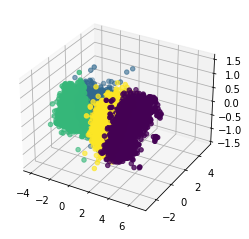

In [23]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [24]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of           PC 1      PC 2      PC 3      PC 4 Cluster    State
0    -2.390864 -0.513969  0.329176  0.136554       2  Alabama
1    -1.327621  0.834048  0.109566 -0.063700       1  Alabama
2     2.159597 -0.051349  0.324950  0.130506       3  Alabama
3    -3.500523  1.656171  0.766767 -0.170314       1  Alabama
4     1.931924 -0.693780  0.174259 -0.330229       3  Alabama
...        ...       ...       ...       ...     ...      ...
1651 -2.308078 -0.047621  0.218474 -0.136362       2  Wyoming
1652  1.556371 -0.016703  0.618425  0.104889       3  Wyoming
1653 -2.121376  0.023740 -0.245224  0.034318       2  Wyoming
1654  0.769919  0.387719  0.213763 -0.308917       3  Wyoming
1655 -1.796922 -0.376610  0.047324 -0.011232       2  Wyoming

[1656 rows x 6 columns]>

In [25]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-2.390864,-0.513969,0.329176,0.136554,2,Alabama
1,-1.327621,0.834048,0.109566,-0.063700,1,Alabama
2,2.159597,-0.051349,0.324950,0.130506,3,Alabama
3,-3.500523,1.656171,0.766767,-0.170314,1,Alabama
4,1.931924,-0.693780,0.174259,-0.330229,3,Alabama
...,...,...,...,...,...,...
1651,-2.308078,-0.047621,0.218474,-0.136362,2,Wyoming
1652,1.556371,-0.016703,0.618425,0.104889,3,Wyoming
1653,-2.121376,0.023740,-0.245224,0.034318,2,Wyoming
1654,0.769919,0.387719,0.213763,-0.308917,3,Wyoming


In [26]:
clusters_and_their_states.values()

dict_values([[], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Iowa', 'Nebraska', 'South Dakota'], [], ['District of Columbia', 'Massachusetts', 'Rhode Island', 'Vermont']])

In [27]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [28]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("march Mobility KMeans.html")
                   )


'march Mobility KMeans.html'